# Edm 2016 experimentation
Here is a notebook to reproduce the experimentation done in teh paper "A Comparison of Automatic Teaching Strategies for Heterogeneous Student Populations".
To use it : 
 - git clone -b edm2016 --single-branch https://github.com/flowersteam/kidlearn.git
 - enter the directory notebooks/edm2016.
 - open the Jupyter notebook
 
Warning : be aware that experiments need a lot of RAM while running (> 2 GO), expecialy with a high number of learner. 

In [1]:
import sys
sys.path.append("../..")
sys.path.append("../../run_xp")
%matplotlib inline
import kidlearn_lib as k_lib
import plot_graphics as graph
import run_xp

## Single model results
The first experiment will do a sanity check to evaluate each of the algorithm in standard conditions where the population of learners is the same where each algorithm is optimized. We expect POMDP to have the best results but it is not clear how far ZPDES will be from the optimal solution. For these experimentation, there is only one model used for the learner, and POMDP, ZPDES$^*$ and ZPDES$^H$ are configured for the same model.

In [2]:
#If you want to lauch the simulation :

ref_learner = ["0"] # to change the model, put an other number between 0 and 4. 

xp = run_xp.multi_kt_xp(nb_stud=600, #number of learner per model
                        nb_step=100, #number of step
                        disruption=0, #the population is not disrupted
                        refs_opti=ref_learner,  # model to configure algorithms
                        refs_stud=ref_learner) # models used to configure learner 

POMDP
Random
ZpdesH
Zpdes*


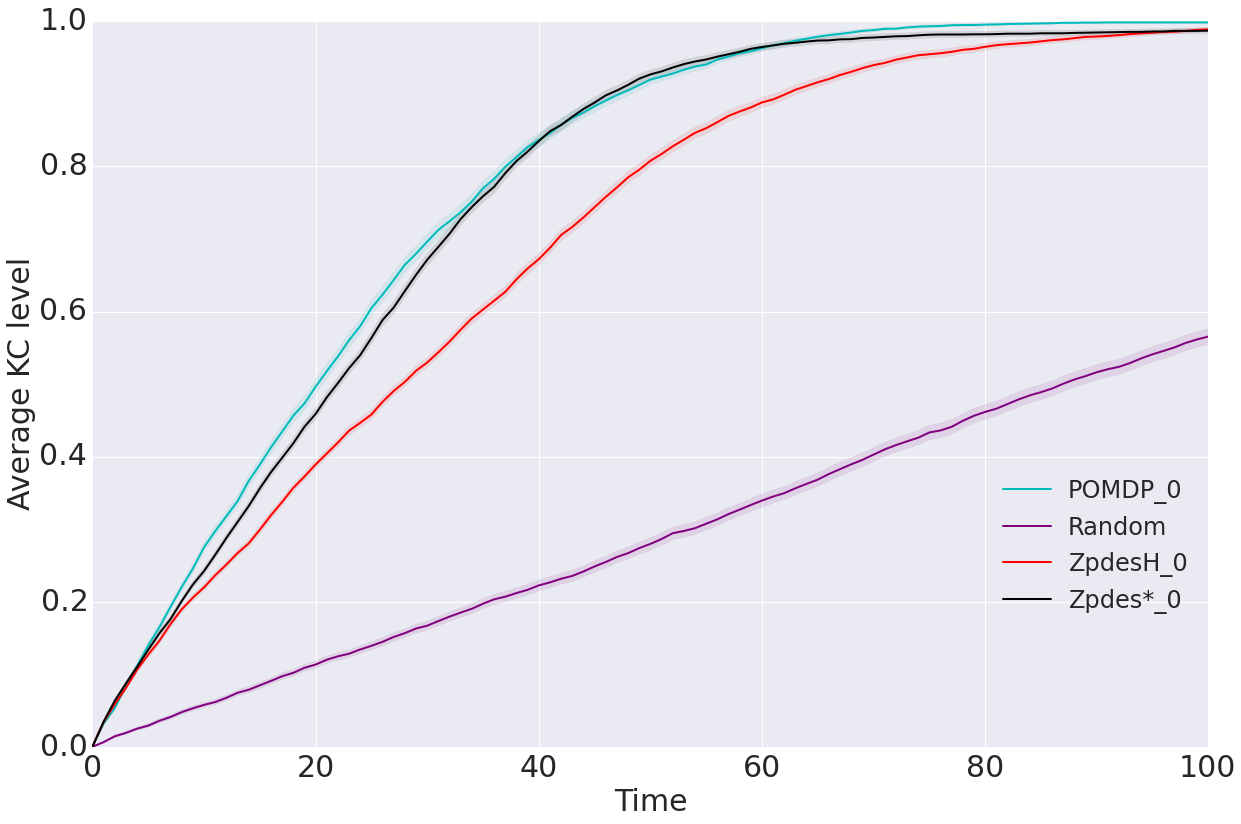

In [3]:
# Draw Kc average level
run_xp.draw_xp_kc_curve(xp, ref_sub_group=ref_learner, subgroup_treat=True, use_std=True)

In [4]:
# calcul of p-values for step 50 and 100
pvals = run_xp.calcul_pvals(xp, steps=[50,99], save_vals=True)
print pvals

{'Random/Zpdes*': [0.0, 7.6695455917737507e-200], 'POMDP/Random': [0.0, 7.3628745573207045e-222], 'Random/ZpdesH': [1.8428943031532685e-255, 2.0662521277853964e-205], 'ZpdesH/Zpdes*': [1.1718820372867545e-28, 0.77393391354783181], 'POMDP/ZpdesH': [1.1735480340637146e-24, 0.0018253240723613321], 'POMDP/Zpdes*': [0.44210407926653461, 0.0027973062120970039]}


## Multi model results
We will now present the main results of this work with the comparison between POMDP, ZPDES$^*$ and ZPDES$^H$ when confronted with heterogeneous populations of learners. The protocol of the experiments is as follows. First we provide each algorithm the information about a specific population of students and then we test the capability of the algorithms to address a population of students with different knowledge graphs. As described before each algorithm is given information about a particular population of student, POMDP receives the graph and the transition probabilities, ZPDES$^*$ receives the graph and exploration parameters optimized for that same graph, ZPDES$^H$ receives the graph and standard parameters for the graph exploration. 

In [2]:
#ref_learner = ["0","1","2"] #first setup
#ref_learner = ["0","3","4"] #second setup
ref_learner = ["2","3","4"] #third setup 

#ref_algo = ["0","1","2"] # first setup
#ref_algo = ["0","3","4"] #second setup
ref_algo = ["0","1"] #third setup

xp = run_xp.multi_kt_xp(nb_stud=100, #number of learner per model
                        nb_step=400, #number of step
                        disruption=1, #the population is disrupted
                        refs_opti=ref_algo, # model to configure algorithms
                        refs_stud=ref_learner) # models used to configure learner 

POMDP
ZpdesH
Zpdes*


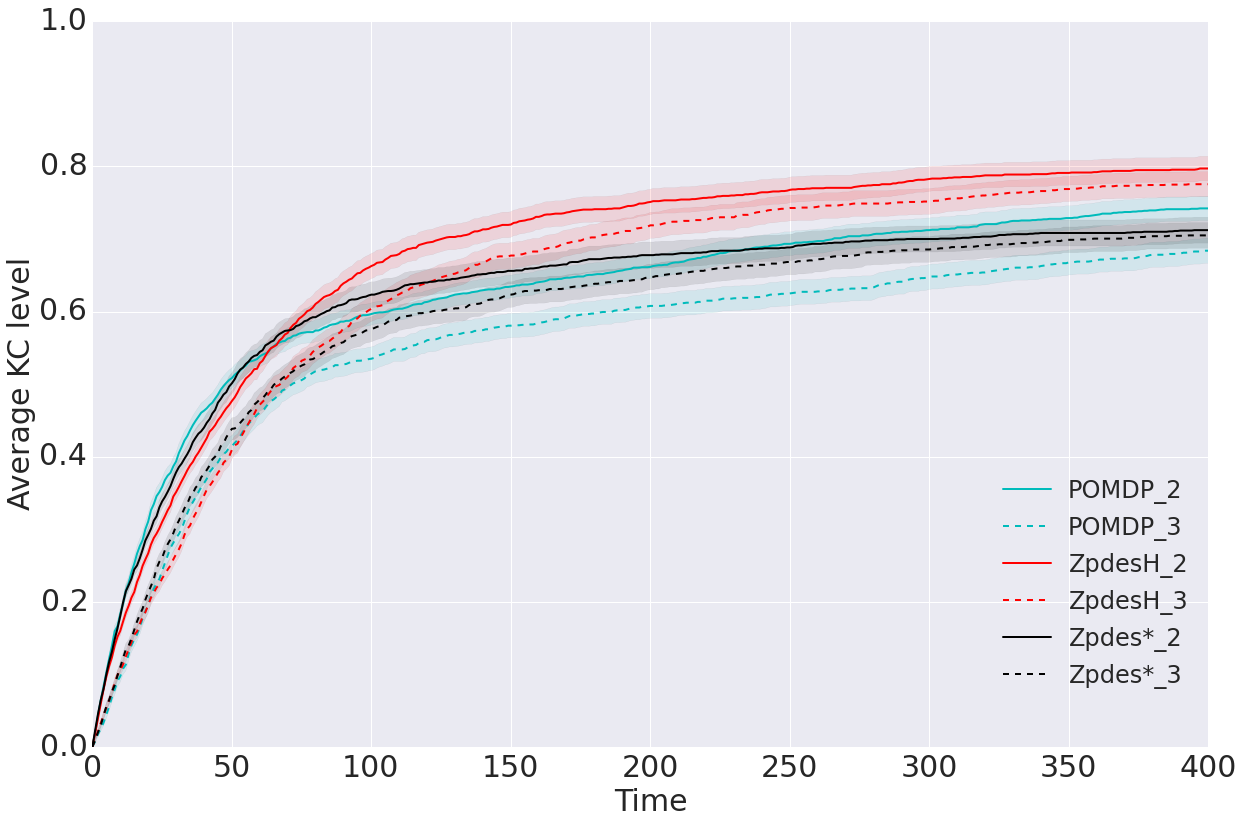

In [3]:
# Draw Total Kc average level 
run_xp.draw_xp_kc_curve(xp, use_std=True)
# Draw Subgroups Kc average level
run_xp.draw_xp_kc_curve(xp, ref_sub_group=ref_learner, subgroup_treat=True, use_std=True)

In [4]:
# calcul of p-values for step 50 and 200
pvals = run_xp.calcul_pvals(xp, steps=[50,199], save_vals=True)
print pvals

{'ZpdesH/Zpdes*': [0.22608741555337183, 0.004043747699245679], 'POMDP/ZpdesH': [0.1100509269686758, 0.00019366501099935175], 'POMDP/Zpdes*': [0.71882619852149299, 0.49277926589260246]}
